In [2]:
from math import log
from random import random
from matplotlib import pyplot as plt

Total: 3000 Infection: 20 Recovery: 24


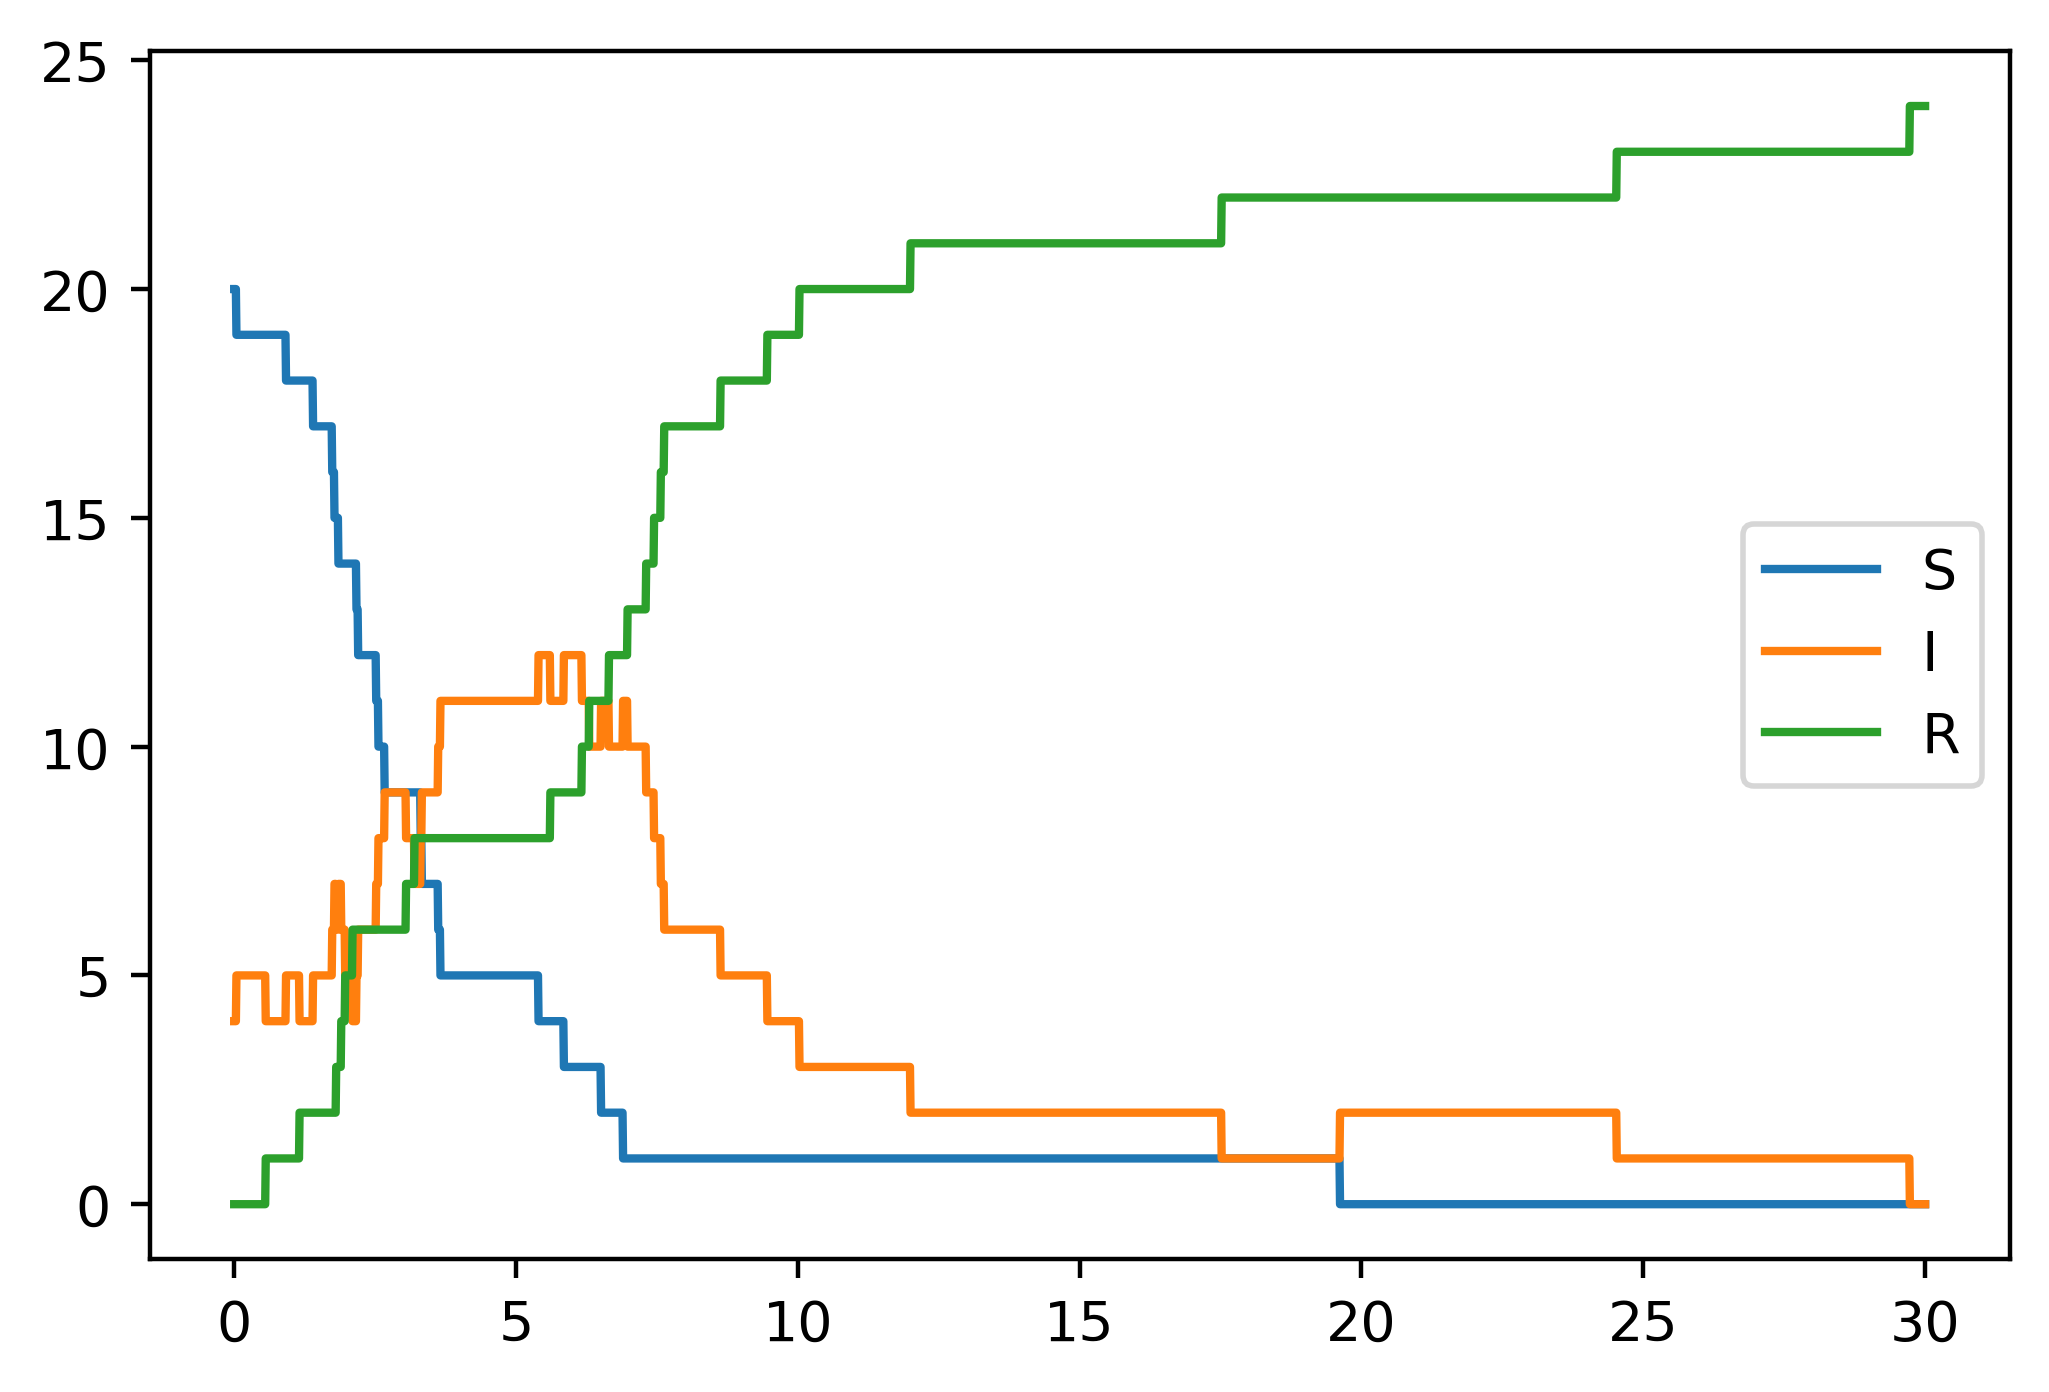

In [3]:
# DTMC SIR
class SIR:
    def __init__(self, S0=999, I0=1, R0=0, beta=1, gamma=0.5, t_end=20, dt=0.001):
        self.t = [0]
        self.S = [S0]
        self.I = [I0]
        self.R = [R0]
        self.N = S0 + I0 + R0
        self.beta = beta
        self.gamma = gamma
        self.t_end = t_end
        self.dt = dt

    def solve(self):
        n = self.N
        beta, gamma = self.beta, self.gamma
        dt = self.dt
        t = 0
        c = 0   # counter total
        ci = 0  # counter infection
        cr = 0  # counter recovery

        while t < self.t_end:
            s,i,r = self.S[-1], self.I[-1], self.R[-1]
            p1 = (beta * s * i / n) * dt
            p2 = (gamma * i) * dt
            u = random()
            if 0 < u < p1:
                s -= 1
                i += 1
                ci += 1
            elif p1 < u < p1+p2:
                i -= 1
                r += 1
                cr += 1
            
            t += dt
            self.t.append(t)
            self.S.append(s)
            self.I.append(i)
            self.R.append(r)
            c += 1

        print('Total:', c, 'Infection:', ci, 'Recovery:', cr)
        return (self.S, self.I, self.R)

    def plot(self):
        fig,ax = plt.subplots(1,1,dpi=400)
        ax.plot(self.t, self.S, label='S')
        ax.plot(self.t, self.I, label='I')
        plt.plot(self.t, self.R, label='R')
        ax.legend()
        plt.show()

sir = SIR(S0=20, I0=4, R0=0, beta=1.2, gamma=0.2, t_end=30, dt=0.01)
sir.solve()
sir.plot()

-13.559797837669525
-1.5543308615856486
-13.909301985130469
-9.039789101613783
-2.8162536722897595
-9.885377601206088
-6.758195309179824
-0.876866596063646
-4.330125255838888
-5.3476639375645
-0.4621227322399593
-8.512666289746798
-9.173055668534012
-10.984083171145143
-0.1695560572890596
-1.1536922146873498
-5.282609688036546
-12.051364641429366
-6.136092337515997
-11.047642757815598
-9.958481119085475
-1.9705719982042924
-5.44162280058194
-1.8525578240416312
-12.721071519177269
-6.331358565264507
-1.33684487462212
-2.612300351553202
-1.459818869894845
-1.331215650010253
-9.71397974840419
Total: 31 Infection: 20 Recovery: 11


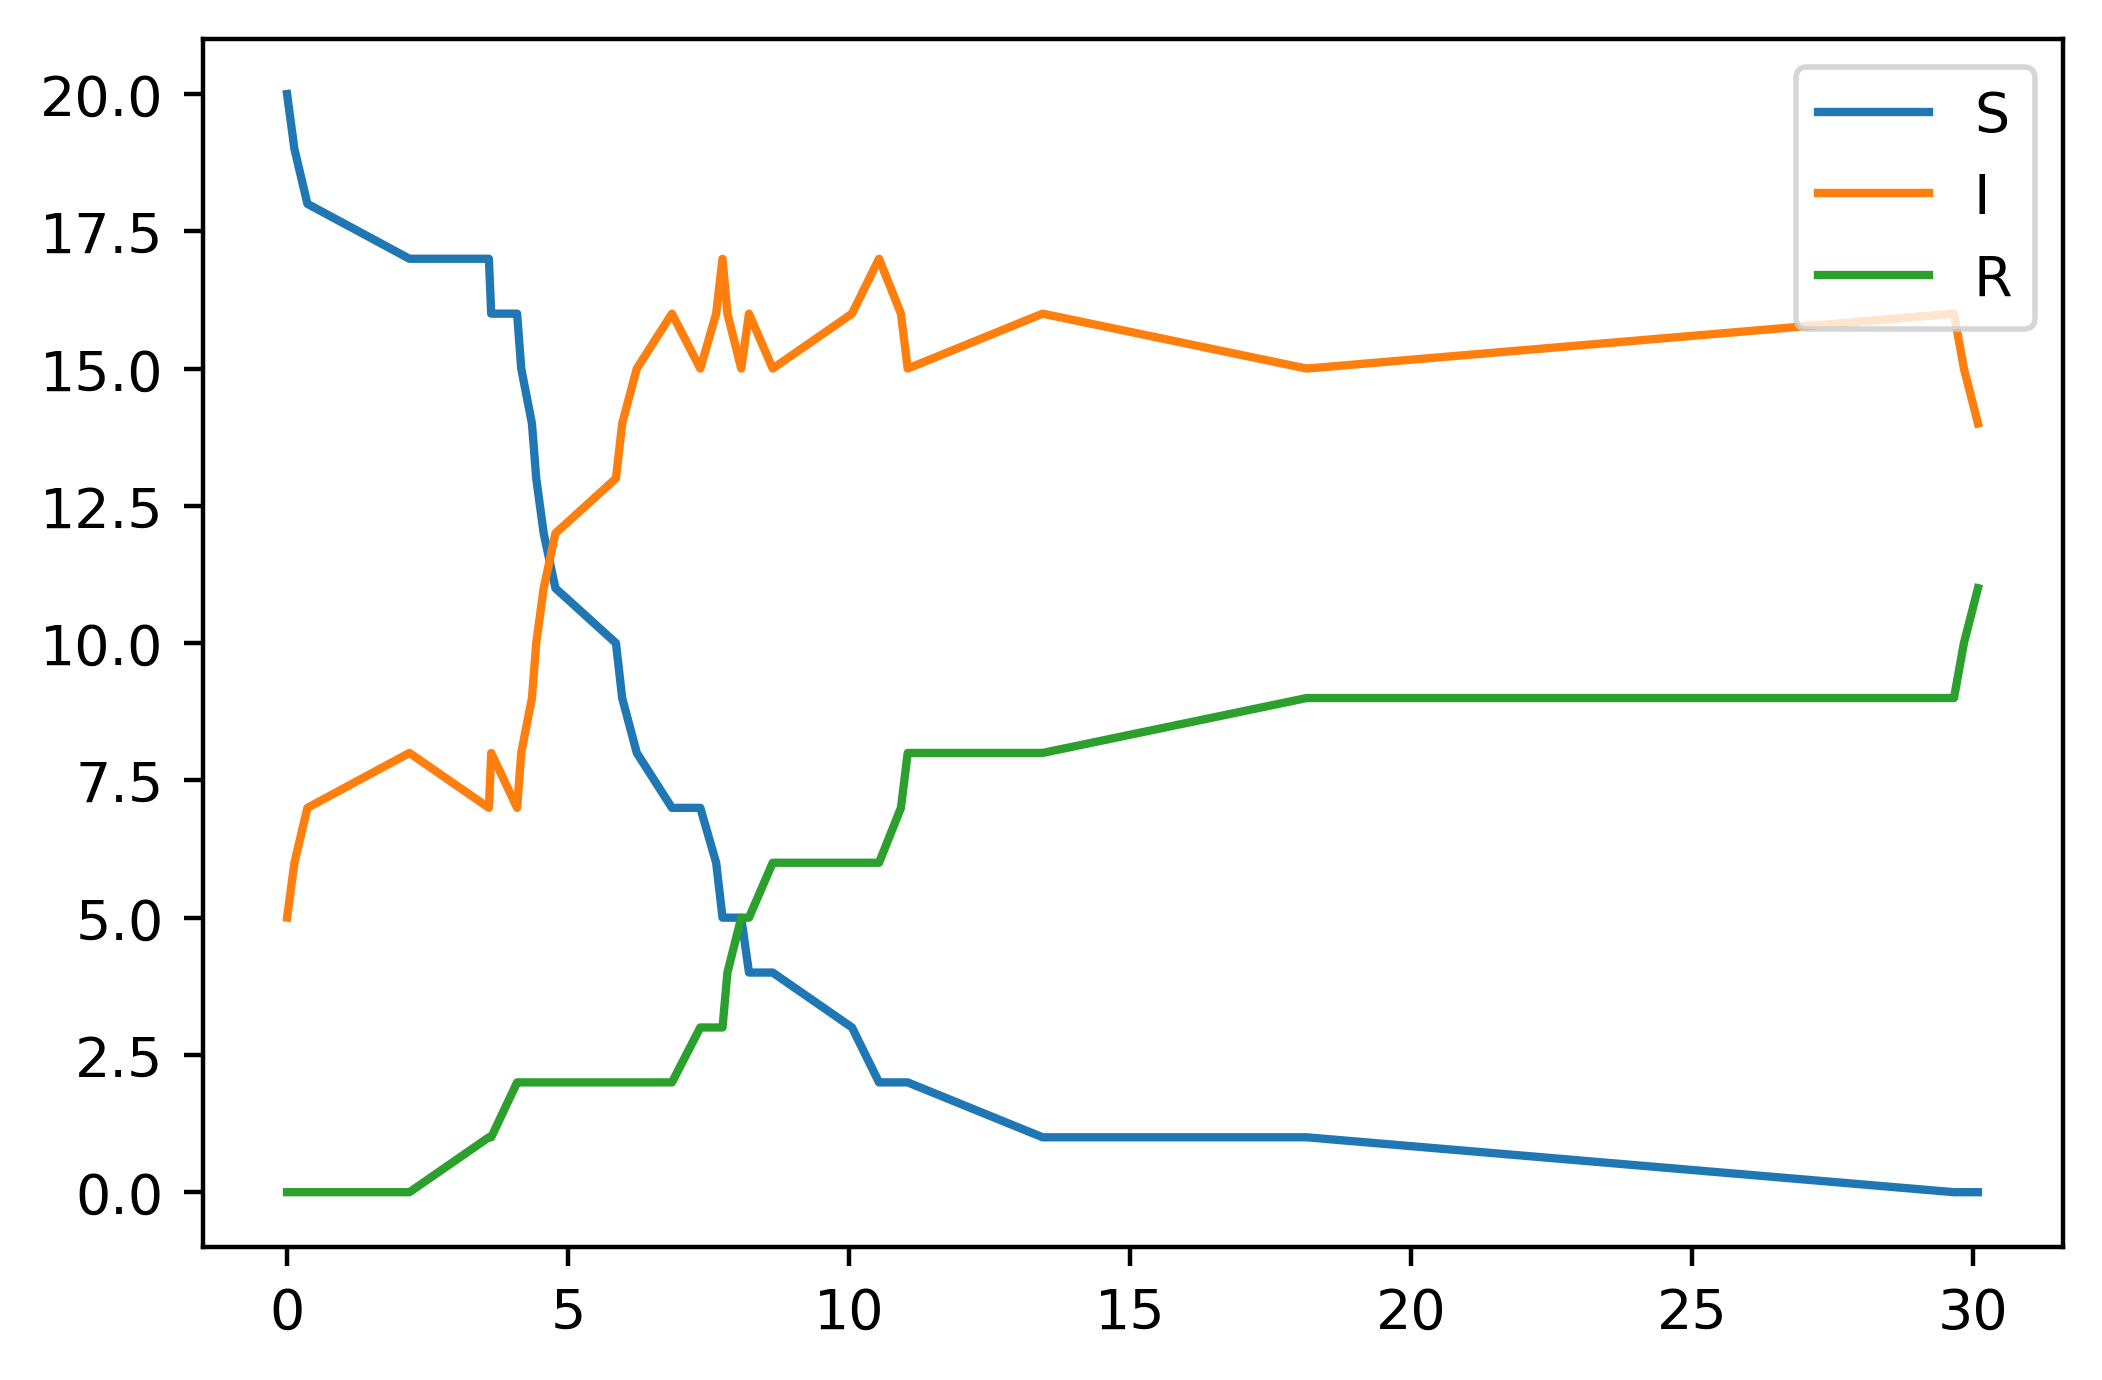

In [16]:
# CTMC SIR
class SIR:
    def __init__(self, S0=999, I0=1, R0=0, beta=1, gamma=0.5, t_end=20):
        self.t = [0]
        self.S = [S0]
        self.I = [I0]
        self.R = [R0]
        self.N = S0 + I0 + R0
        self.beta = beta
        self.gamma = gamma
        self.t_end = t_end

    def solve(self):
        n = self.N
        beta, gamma = self.beta, self.gamma
        t = 0
        c = 0   # counter total
        ci = 0  # counter infection
        cr = 0  # counter recovery

        while t < self.t_end:
            s,i,r = self.S[-1], self.I[-1], self.R[-1]

            event_rate = beta * s * i / n + gamma * i
            print(event_rate * log(1 - random()))
            inter_event_time = -1 / event_rate * log(1 - random())
            u = random() * event_rate
            v = random()
            # print(event_rate)
            # print(inter_event_time)
            p1 = (beta * s * i / n) #* inter_event_time
            p2 = (gamma * i) #* inter_event_time
            # print(p1)
            # print(p2)
            if 0 < u < p1:
                s -= 1
                i += 1
                ci += 1
            elif p1 < u < p1+p2:
                i -= 1
                r += 1
                cr += 1
            
            t += inter_event_time
            self.t.append(t)
            self.S.append(s)
            self.I.append(i)
            self.R.append(r)
            c += 1

        print('Total:', c, 'Infection:', ci, 'Recovery:', cr)
        return (self.S, self.I, self.R)

    def plot(self):
        fig,ax = plt.subplots(1,1,dpi=400)
        ax.plot(self.t, self.S, label='S')
        ax.plot(self.t, self.I, label='I')
        plt.plot(self.t, self.R, label='R')
        ax.legend()
        plt.show()

sir = SIR(S0=20, I0=5, R0=0, beta=1.2, gamma=0.2, t_end=30)
sir.solve()
sir.plot()